#### Setup

Notes : 

- df1 : Data Transkrip Mahasiswa

- df2 : Data Evaluasi Dosen per Mata Kuliah

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

In [56]:
df1 = pd.read_csv("Dataset1_TranscriptMahasiswa.csv", sep=";", dtype={"NIM" :"object", "NAMA_MK" : "string"})
df2 = pd.read_csv("Dataset2_EvaluasiDosenPerMK.csv", sep=";", decimal=",")
df3 = pd.DataFrame()

In [194]:
df1["NIM"].nunique()

770

#### Data Cleansing

Dataframe 1 (Transkrip Mahasiswa)

In [4]:
df1['KODE_MK'][df1['NAMA_MK'].isnull()].unique()

array(['SI863'], dtype=object)

In [52]:
df1["NAMA_MK"] = df1["NAMA_MK"].fillna("Tugas Akhir") # Kebetulan yang null cuman SI863

for i in df1.index:  
    if df1.at[i, "KODE_MK"] not in df1.at[i, "NAMA_MK"].split(" ") : 
        df1.at[i, "NAMA_MK"] = df1.at[i, "KODE_MK"] + " " + df1.at[i, "NAMA_MK"]

In [53]:
indeks = ["A", "A-", "B+", "B", "B-", "C+", "C", "D", "E", "F"]
bobot = [4, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.0, 0, 0]
ranges = [[100, 85], [84.99, 80], [79.99, 75], [74.99, 70], [69.99, 65], [64.99, 60], [59.99, 55], [54.99, 45], [44.99,0]]

for i in df1.index: 
    for j in ranges: 
        if j[1] <= df1.at[i, "NILAI"] <= j[0]:
            df1.at[i, "GRADE"] = indeks[ranges.index(j)]

for i in df1.index:
    for j in indeks:
        if df1.at[i, "GRADE"] == j:
            df1.at[i, "BOBOT"] = bobot[indeks.index(j)]

In [54]:
df1.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,2.0
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,3.0
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,2.0
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,2.0
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,3.0


In [9]:
df1[df1['GRADE'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT


In [10]:
df1["NILAI"] = df1["NILAI"].fillna(0)
df1[df1['NILAI'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT


Dataframe 2 (Evaluasi Dosen per Mata Kuliah)

In [11]:
df2.head(14)

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,3.28
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,3.24
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,3.30
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27
5,2015,1511,IS100 Management Information Systems,6,Pemakaian buku teks sebagai buku utama perkuli...,3.19
6,2015,1511,IS100 Management Information Systems,7,Memberi review materi perkuliahan sebelumnya,3.18
7,2015,1511,IS100 Management Information Systems,8,"Pemberian kesempatan bertanya, berdiskusi sert...",3.32
8,2015,1511,IS100 Management Information Systems,9,Kejelasan menjawab pertanyaan /diskusi di kelas,3.29
9,2015,1511,IS100 Management Information Systems,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.24


Data Exploration

Text(0, 0.5, 'Jumlah')

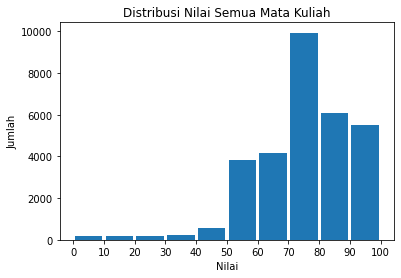

In [38]:
plt.title("Distribusi Nilai Semua Mata Kuliah")
plt.hist(df1["NILAI"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], rwidth=0.9)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel("Nilai")
plt.ylabel("Jumlah")

In [184]:
df3_ = pd.DataFrame(df1.groupby(["NIM"])["SKS"].sum().reset_index())
df3__ = pd.DataFrame(df1.loc[(df1["GRADE"] == "D") | (df1["GRADE"] == "E") | (df1["GRADE"] == "F")].groupby("NIM")["GRADE"].sum().reset_index())
df3 = pd.merge(df3_, df3__, how="left", on=["NIM"])
df3["GRADE"] = df3["GRADE"].fillna("")
df3

,NIM,SKS,GRADE
0,00000008429,145,D
1,00000008455,136,DD
2,00000008481,127,DDDEEED
3,00000008631,145,
4,00000008684,145,
...,...,...,...
765,14110310095,145,DD
766,14110310098,145,D
767,14110310101,138,
768,14110310102,133,EEE


In [185]:
# Belum Nambah Faktor yang ngulang terus nilainya udah lulus
for i in df3.index:
    if df3.at[i, "SKS"] >= 144 and df3.at[i, "GRADE"] == "":
        df3.at[i, "TIDAK_LULUS"] = False
    else:  
        df3.at[i, "TIDAK_LULUS"] = True


In [190]:
df3["TIDAK_LULUS"].value_counts()

True     587
False    183
Name: TIDAK_LULUS, dtype: int64

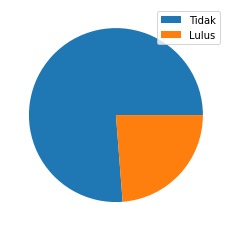

In [191]:
plt.pie(df3["TIDAK_LULUS"].value_counts())
plt.legend(["Tidak", "Lulus"])